failures_per_km=0.0010666666666666667
break_length=2193.66545


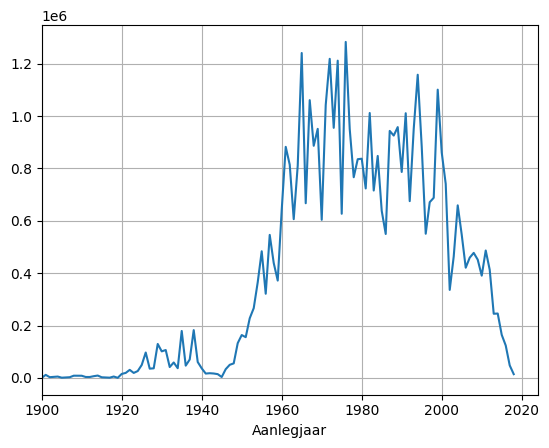

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

data = pd.read_csv(
    "Failure_modelling/Failure_Data/failures_2010.csv",
    delimiter=";",
    index_col=3,
    parse_dates=True,
)
data_specific = data[
    (data["relatie_code"] == "A")
    & (data.index.year == 2010)
    & (data["storing_diameter"] >= 50)
]

number_failures = data_specific["relatie_code"].count()
total_length = 120000
failures_per_km = number_failures / total_length
print(f"{failures_per_km=}")


data_pipes = pd.read_csv(
    "Failure_modelling/Failure_Data/2024_processed_leidingen_glisexport.csv",
    delimiter=";",
    index_col=0,
)
data_specific = data_pipes[
    (data_pipes["Bedrijf"] == "A")
    & (data_pipes["Batch jaartal"] == 2010)
    & (data_pipes["Diameter"] >= 50)
]
break_length = data_specific["Lengte"].sum() / 1000
print(f"{break_length=}")


fig, ax = plt.subplots()
data_pipes["Lengte"].groupby(data_pipes["Aanlegjaar"]).sum().plot(ax=ax)
ax.set_xlim(1900, 2024)
plt.grid()
plt.show()
